In [2]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [3]:
import umap

reducer = umap.UMAP(n_components=20,min_dist=0,n_neighbors=20)

d:\anaconda3\envs\aiastro\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import seaborn as sns

# 定义初始颜色
sns.color_palette("Spectral", as_cmap=True)
def combine_data(path):
    file_name = []
    dataset = []
    class_len = []
    for file in os.listdir(path):
        if file.endswith("_data.npy"):
            file_name.append(file)
    for file_path in [os.path.join(path, file) for file in file_name]:
        data = np.load(file_path)
        data = np.nan_to_num(data, nan=np.nanmedian(data))
        class_len.append(data.shape[0])
        dataset.append(data)
    
    class_name = [file.split("_")[0] for file in file_name]
    dataset = np.concatenate(dataset, axis=0)
    #scal
    dataset = StandardScaler().fit_transform(dataset)    
    return dataset, class_name, class_len 

combine_data, class_name, class_len = combine_data("../npy_data/")
print(combine_data.shape)
print(class_name)
print(class_len)

index = np.cumsum(class_len)
print(index)


def scatter_data_2d(data,class_name,index):
    fig , ax = plt.subplots(figsize=(12,10),dpi = 300)
    fig.patch.set_facecolor('black')
    ax.set_facecolor('black')
    for i in range(len(index)):
        color = sns.color_palette("Spectral", as_cmap=True)(i/len(index))
        if i == 0:
            sc = ax.scatter(data[:index[i],0],data[:index[i],1],
                            label=class_name[i],s=0.5,color=color)
        else:
            ax.scatter(data[index[i-1]:index[i],0],data[index[i-1]:index[i],1],
                       label=class_name[i],s=0.5, color=color)
    ax.legend()
    plt.show()


(19661, 143)
['A', 'CV', 'C', 'DPV', 'ELL', 'MIRA', 'M', 'NC', 'OSARG', 'RRAB', 'RRC', 'RRD', 'RRE', 'SRV', 'S', 'T110', 'T120', 'T1F', 'T1M', 'T2']
[89, 18, 1237, 137, 1360, 1500, 78, 800, 1500, 1500, 1500, 1335, 1378, 1500, 1500, 1500, 97, 1471, 558, 603]
[   89   107  1344  1481  2841  4341  4419  5219  6719  8219  9719 11054
 12432 13932 15432 16932 17029 18500 19058 19661]


In [6]:
#combine_data = np.concatenate((MIRA_data, RRE_data, RRD_data), axis=0)
print(index)
def generate_labels(class_len):
        labels = []
        for i in range(0,len(class_len)):
            labels += [i] * class_len[i]
            #print(len(labels))
        
        return np.array(labels)
labels = generate_labels(class_len)

print(labels.shape)

combine_embedding = reducer.fit_transform(combine_data,y=labels)

[   89   107  1344  1481  2841  4341  4419  5219  6719  8219  9719 11054
 12432 13932 15432 16932 17029 18500 19058 19661]
(19661,)


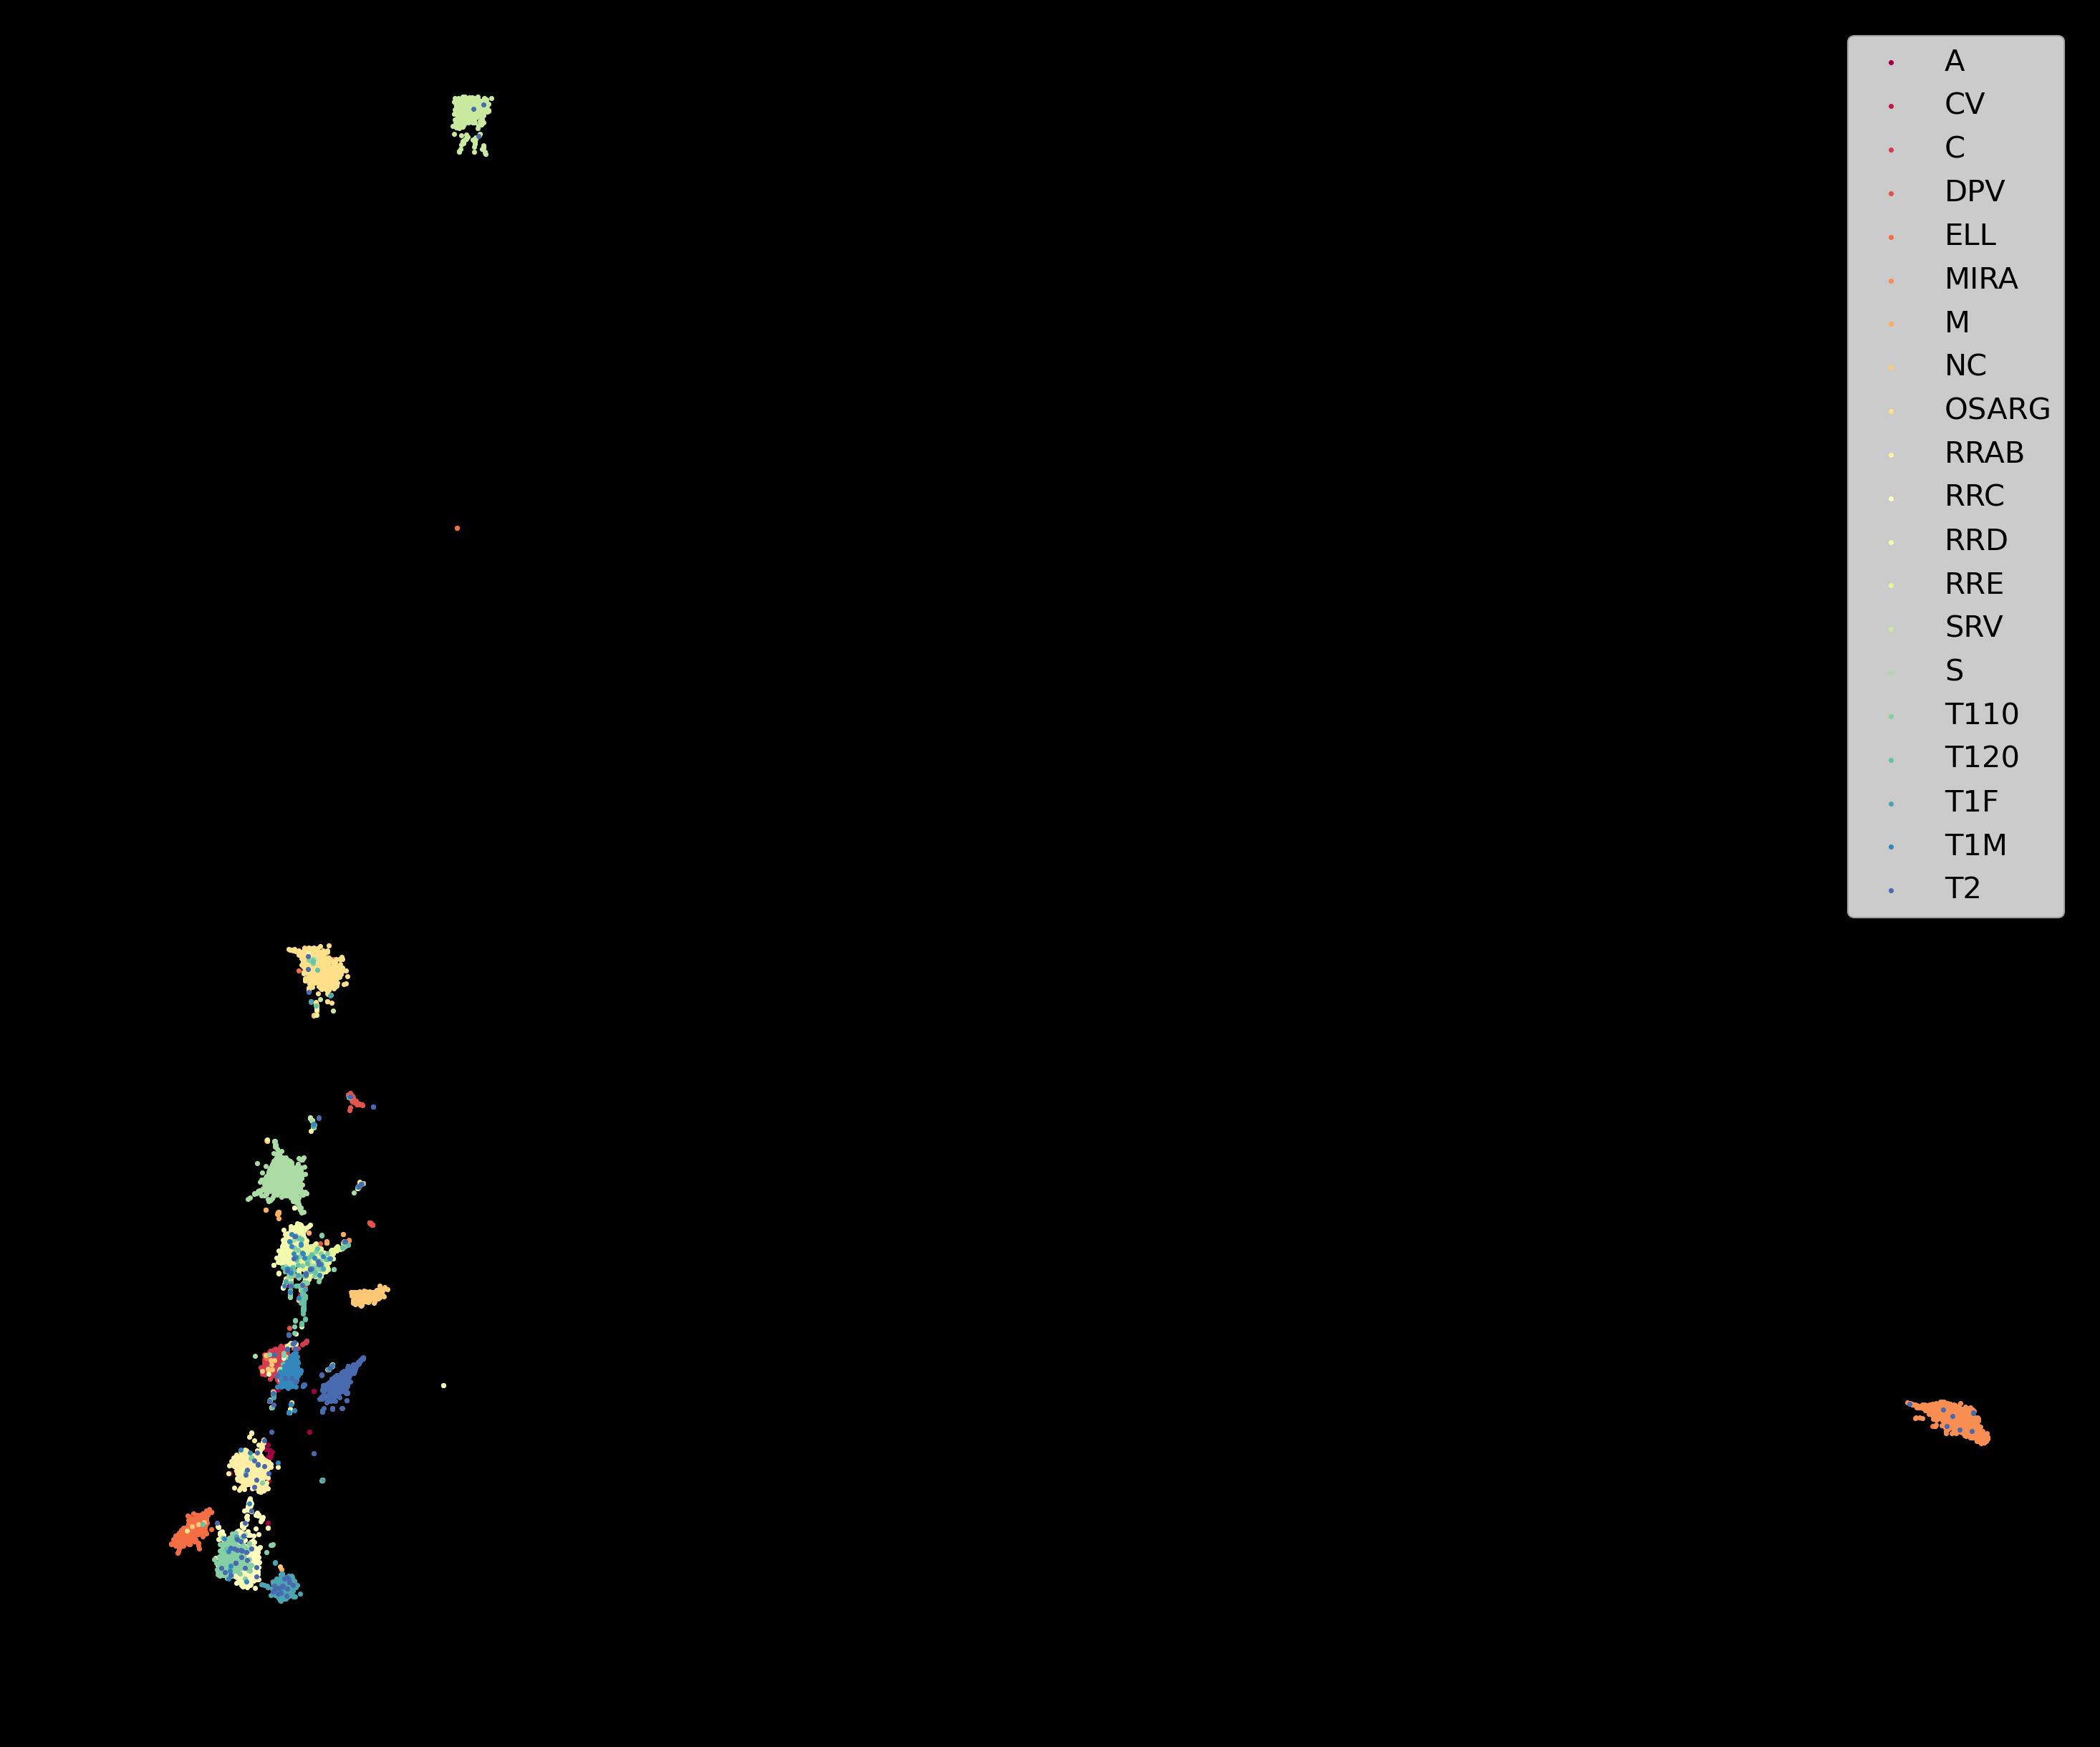

In [7]:
scatter_data_2d(combine_embedding, class_name, index)

In [8]:
import hdbscan
import numpy as np

# 创建HDBSCAN对象并进行聚类
print(combine_embedding.shape)
clusterer = hdbscan.HDBSCAN(min_cluster_size=50,min_samples=5)
cluster_labels = clusterer.fit_predict(combine_embedding)

# 打印每个数据点的聚类标签
print(cluster_labels)

(19661, 20)
[13 13 13 ... 12 10 12]


In [9]:
reducer_visual = umap.UMAP(n_components=2, min_dist=0, n_neighbors=15,target_weight=0.5)
embedding_visual = reducer_visual.fit_transform(combine_data,y=labels)


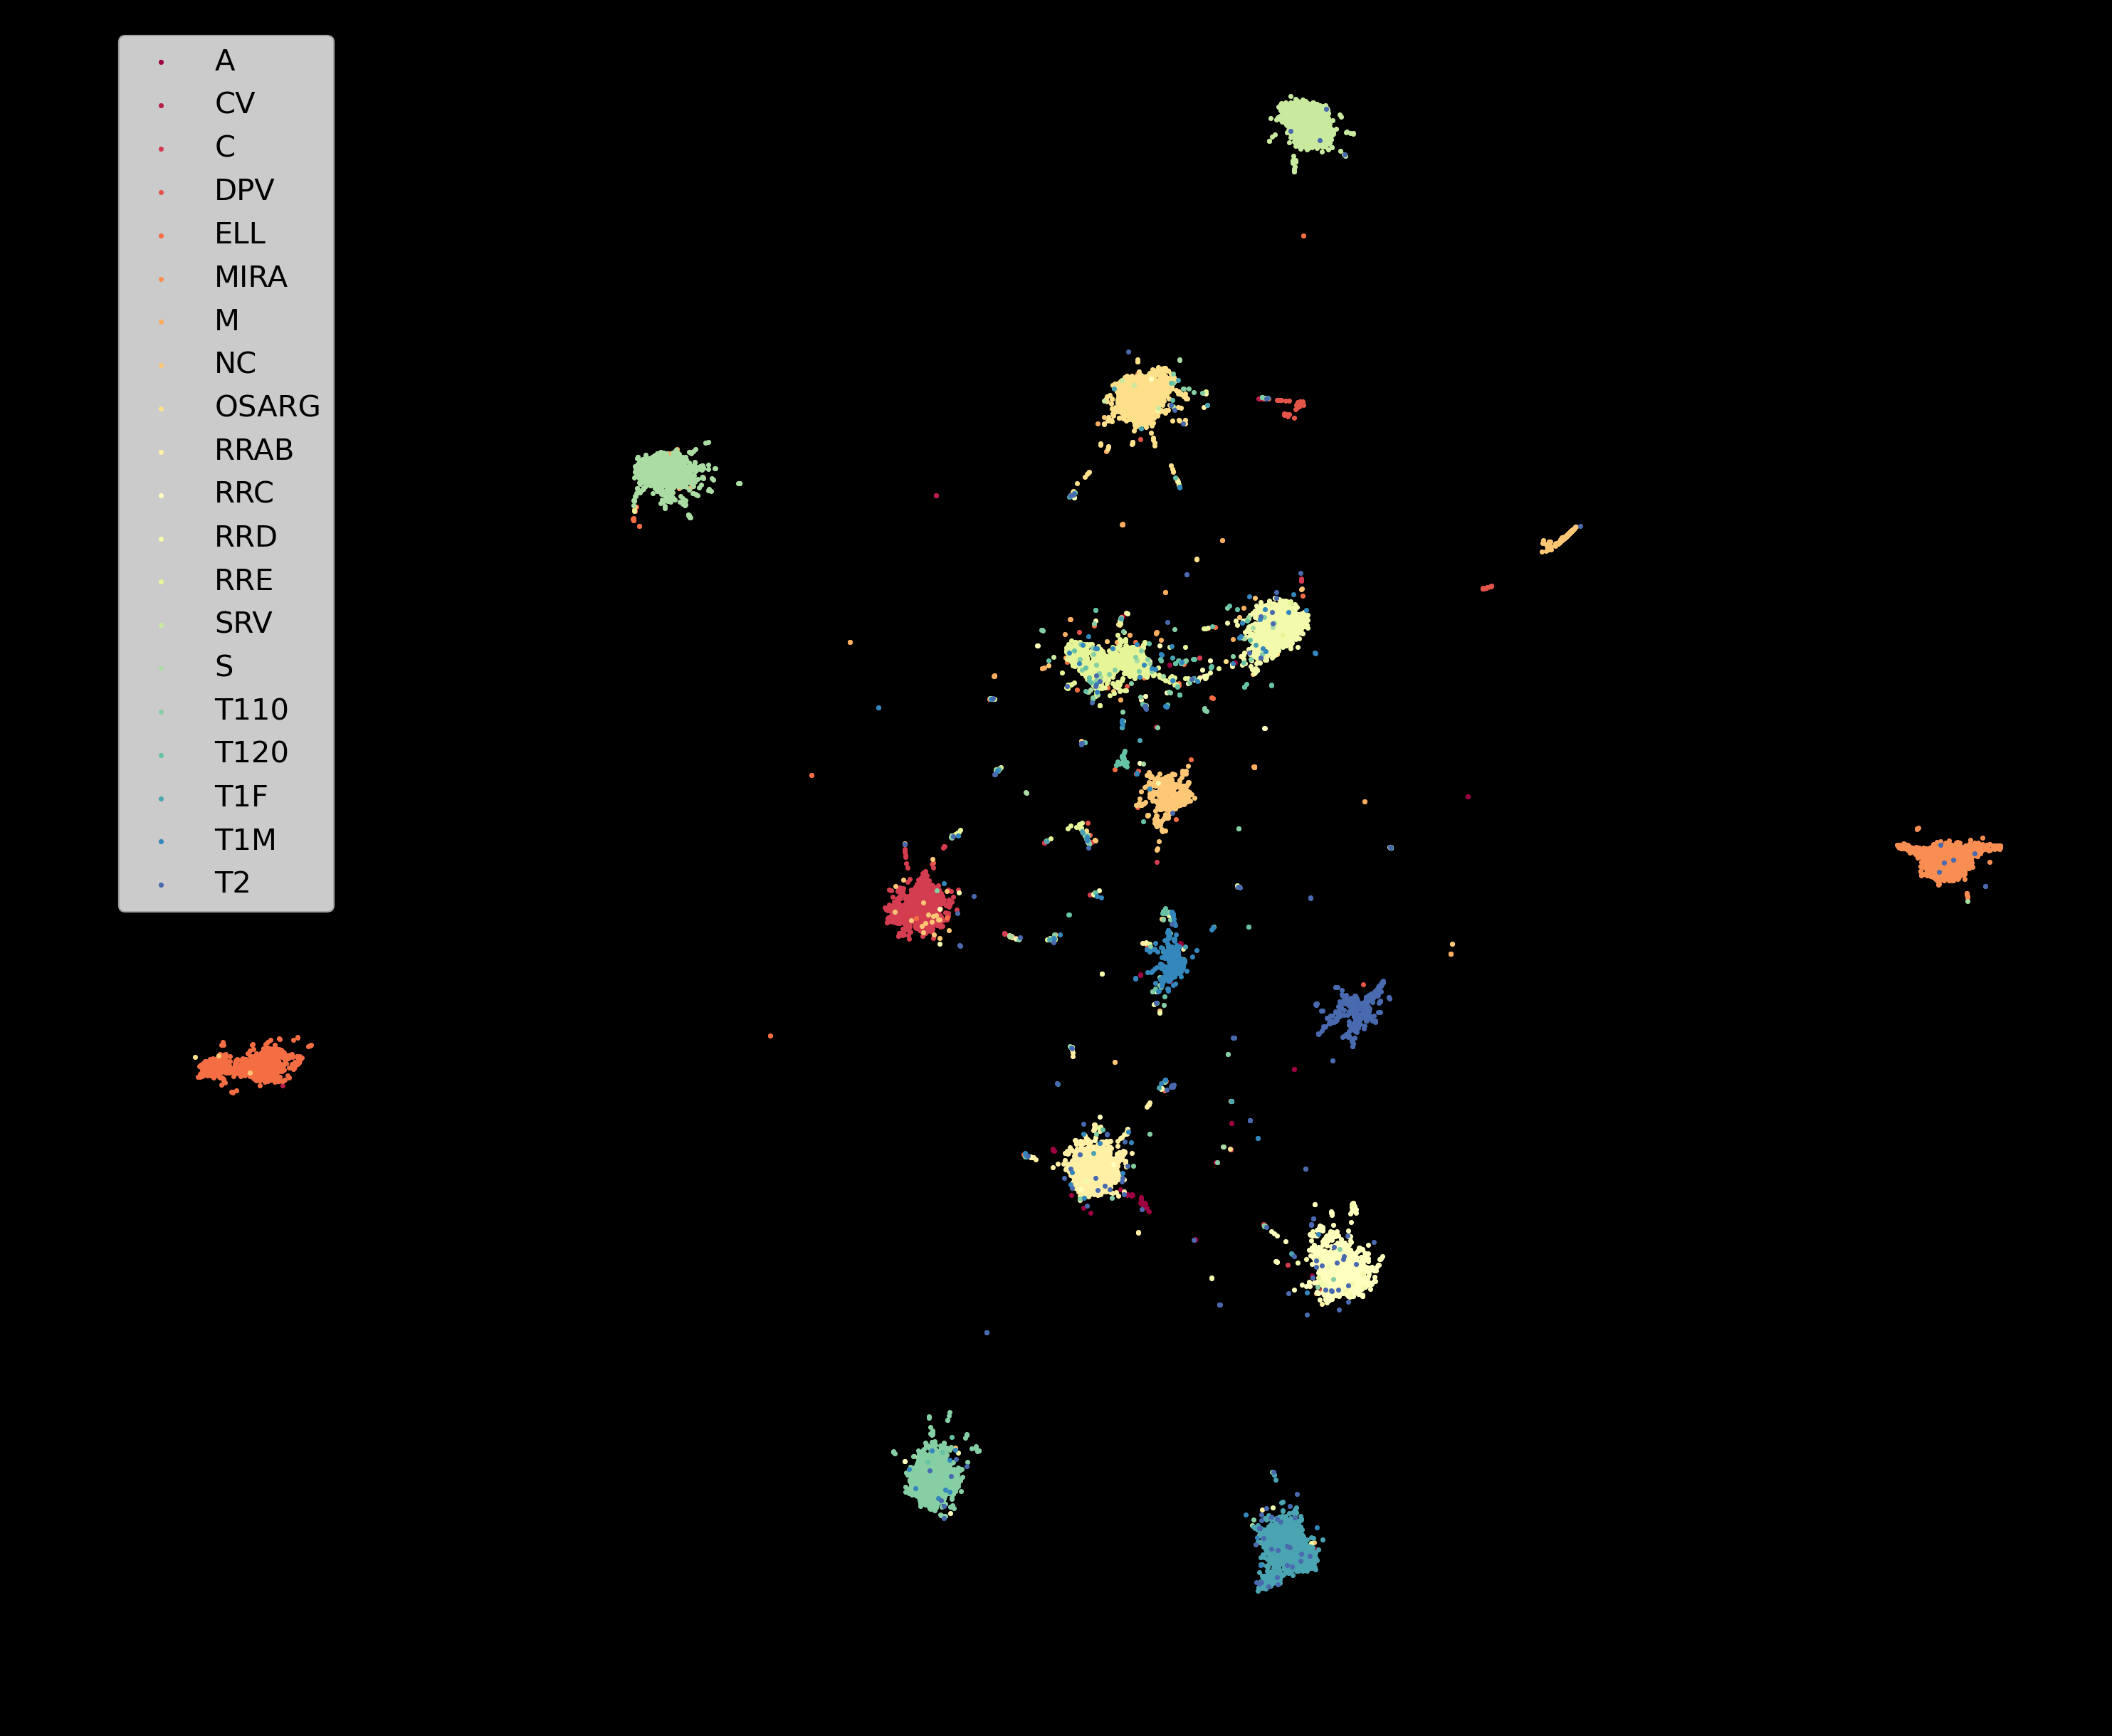

In [10]:
cluster_labels.shape
scatter_data_2d(embedding_visual, class_name, index)

Counter({13: 1562, 7: 1523, 9: 1508, 10: 1503, 1: 1500, 2: 1494, 18: 1470, 4: 1467, 6: 1439, 14: 1344, 0: 1329, 11: 1270, 3: 746, 16: 534, 12: 494, -1: 164, 5: 123, 17: 69, 15: 67, 8: 55})


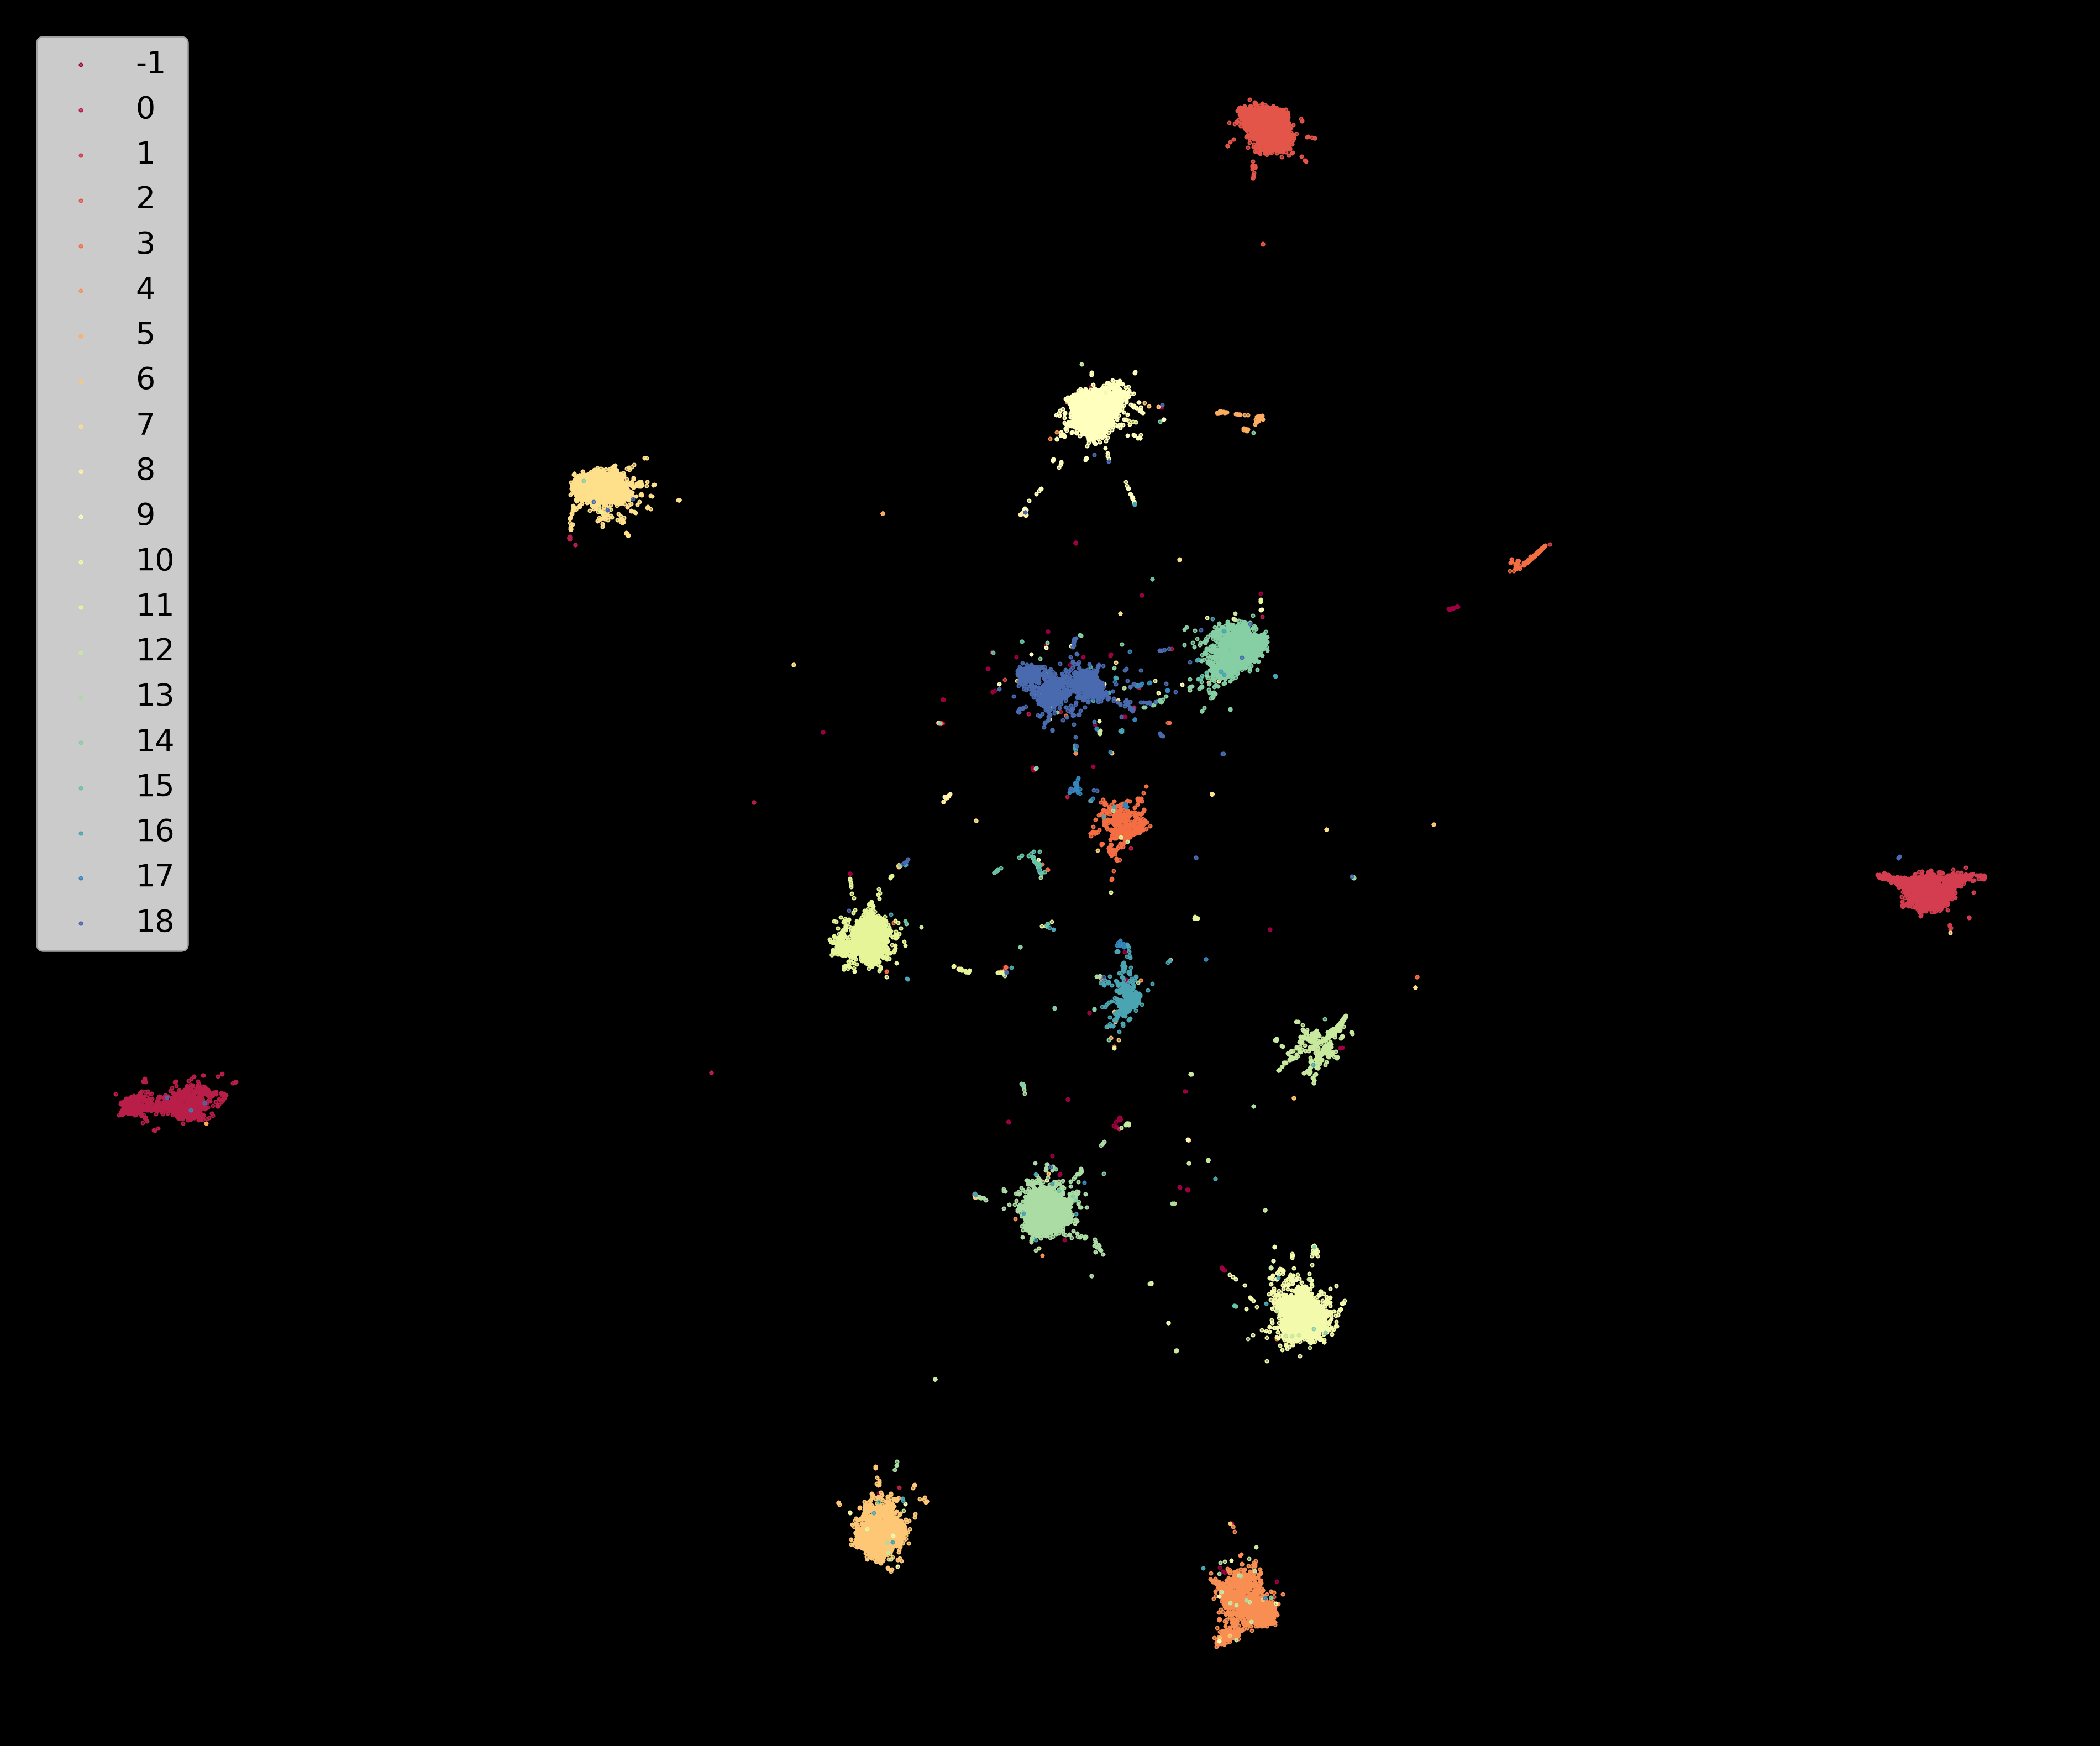

In [11]:
#对每个类别进行计数
import matplotlib.patches as mpatches
from collections import Counter
print(Counter(cluster_labels))

#对预测标签画图
sns.color_palette("Spectral", as_cmap=True)
def scatter_data_2d_hbd(data,labels):
    num = np.unique(labels)
    fig , ax = plt.subplots(figsize=(12,10),dpi=400)
    fig.patch.set_facecolor('black')
    ax.set_facecolor('black')
    squares = []
    for i in range (len(num)):
        index = np.where(labels==num[i])
        colors = sns.color_palette("Spectral", as_cmap=True)((i)/len(num))
        #colors = sns.color_palette("husl", 9)
        ax.scatter(data[index,0],data[index,1],s=0.2,label=num[i],color=colors)
        #color = 
        #square = mpatches.Rectangle((0, 0), 1, 1)
        #ax.legend(handles=squares,labels=num)
        #square.set_facecolor(sns.color_palette("Spectral", as_cmap=True)(i/len(num)))
        #squares.append(square)
        #ax.legend(handles=squares,labels=num) 
    ax.legend(handles=squares,labels=num)
    sns.despine(left=True, right=True, top=True, bottom=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylabel("")
    ax.set_xlabel("")
    plt.show()

scatter_data_2d_hbd(embedding_visual,cluster_labels)

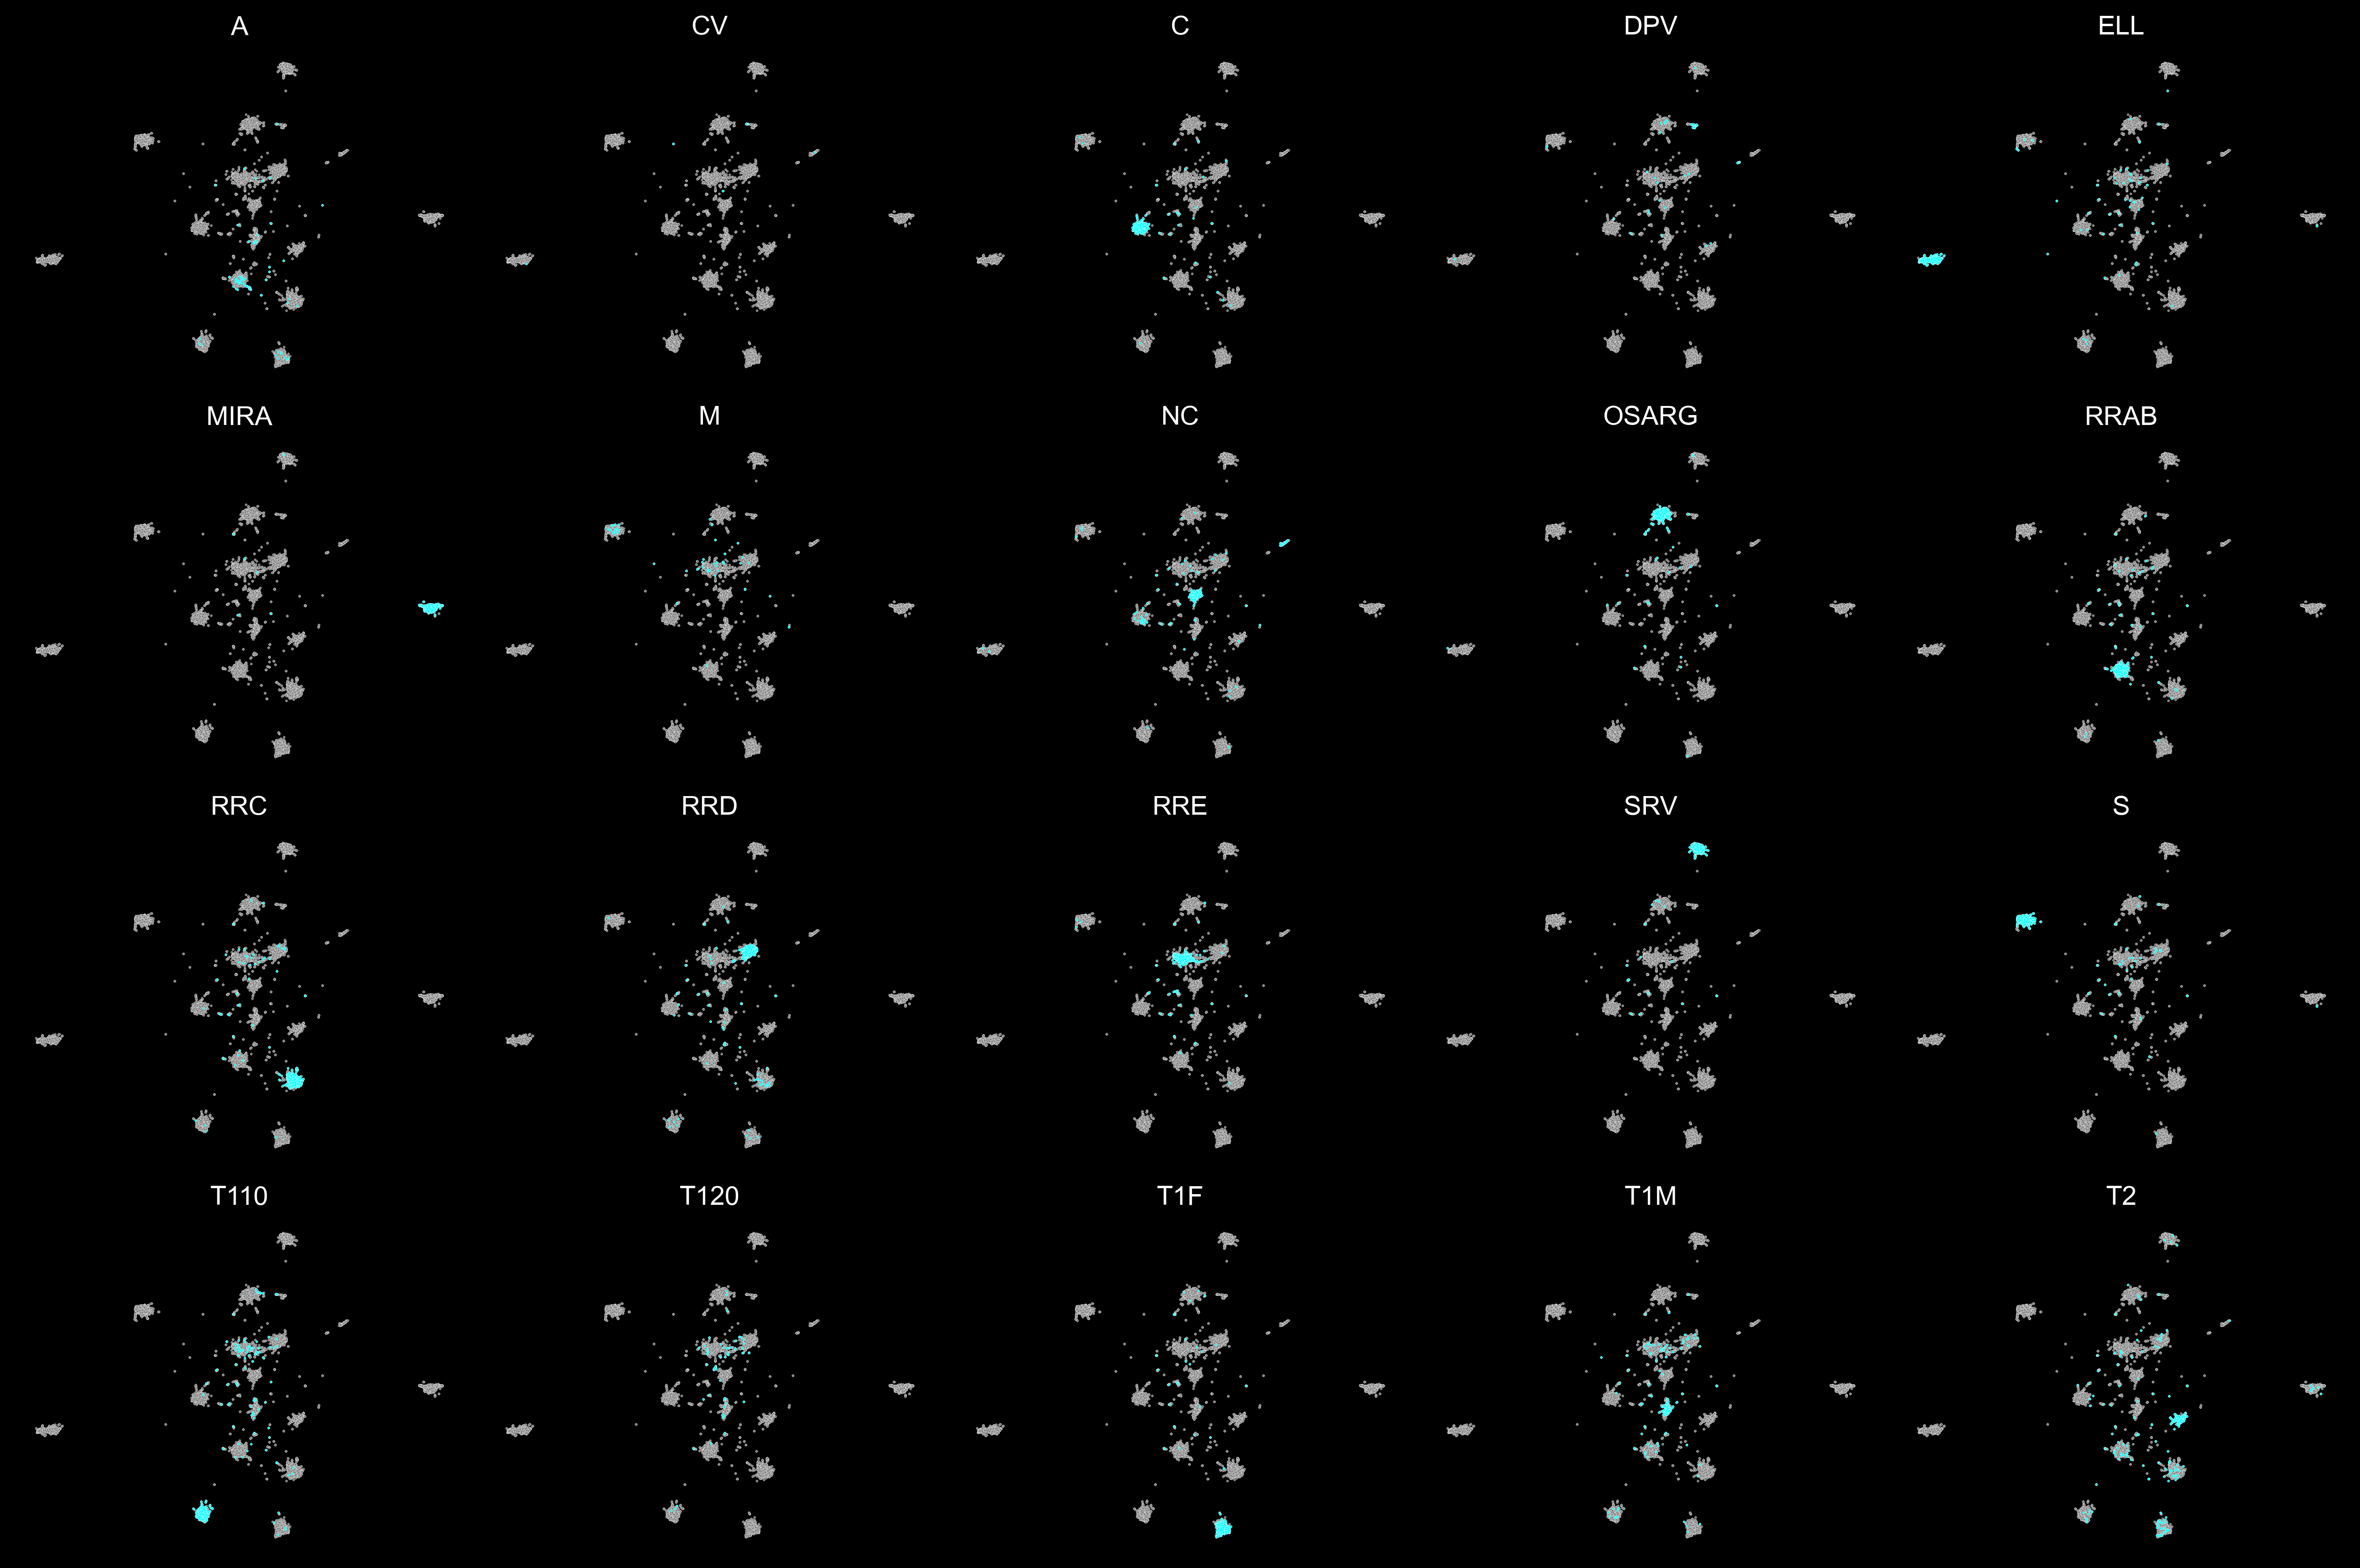

In [12]:
import seaborn as sns
sns.set_style("white")
def scatter_all(data,labels,class_name,cluster_labels):

    fig, axes = plt.subplots(4, 5, figsize=(15, 10),dpi=400)
    fig.patch.set_facecolor('black')
    for i in range(len(class_name)):

        j = np.mod(i,5)
        row = int(i/5)
        index  = np.where(labels==i) 
        sns_emb = pd.DataFrame(data,columns=['x','y'])
        sns_emb['cluster'] = cluster_labels
        sns_emb['True_label'] = labels

        sns_emb_sub = pd.DataFrame(data[index],columns=['x','y'])
        sns_emb_sub['cluster'] = cluster_labels[index]
        sns_emb_sub['True_label'] = labels[index]
        axes[row,j].set_facecolor('black')
        # axes[].scatterplot(x='x',y='y',data=sns_emb,s=2,color='grey')
        # axes.scatterplot(x='x',y='y',hue='cluster',data=sns_emb_sub,s=3,palette='Set1')
        sns.scatterplot(x='x',y='y',data=sns_emb,s=1,color='grey',ax=axes[row,j],legend=False)
        sns.scatterplot(x='x',y='y',data=sns_emb_sub,s=1,ax=axes[row,j],
                        legend=False,c = "cyan")
        sns.despine(left=True, right=True, top=True, bottom=True)
        axes[row,j].set_title(class_name[i],color='white')
        axes[row,j].set_xticks([])
        axes[row,j].set_yticks([])
        axes[row,j].set_xlabel('')
        axes[row,j].set_ylabel('')
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.tight_layout()

scatter_all(embedding_visual,labels,class_name,cluster_labels)

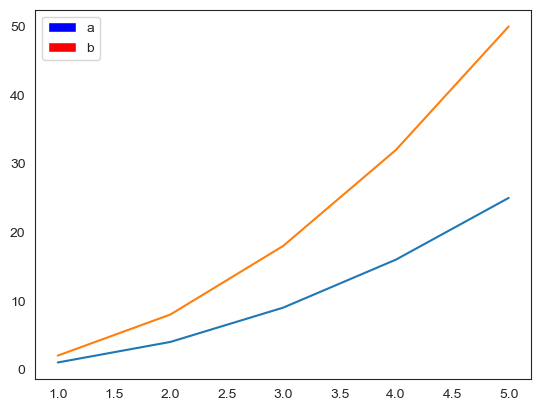

In [13]:
fig, ax = plt.subplots()

# 绘制一些示例数据
x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]
ax.plot(x, y, label='线条')
ax.plot(x, np.array(y) * 2, label='另一个线条')

# 创建一个方块形状的对象
square = mpatches.Rectangle((0, 0), 1, 1, fc="r")
square2 = mpatches.Rectangle((0, 0), 1, 1, fc="b")

# 添加图例，并将图例设为方块形状
ax.legend(handles=[square2,square], labels=['a','b'])

# 显示图表
plt.show()

In [14]:
# P = (N_w) ** (-1) * Max{Ci} {Ci in C}

def calculate_purity(labels,cluster_labels,class_name):
    num = np.unique(labels)
    c_num = np.unique(cluster_labels)
    purity = []
    C_purity = []
    for i in range(1, len(c_num)):
        #N_w 是属于某个簇的个数
        index = np.where(cluster_labels == c_num[i])
        N_w = len(index[0])
        C = []
        for j in range(1, len(num)):
            #index 是cluster_labels中属于某个簇，比如簇0的索引
            index = np.where(cluster_labels == c_num[i])
            #cluster_labels_sub 是属于某个簇的真实标签
            cluster_labels_sub = labels[index]
            #C_i 是属于某个簇的真实标签中，属于某个类别的个数
            C_i = len(np.where(cluster_labels_sub == num[j])[0])
            C.append(C_i)
        C_max = np.max(C)
        #同时给出C_max所对应的类别
        #print(C)
        C_max_index = np.argmax(C)
        #print(C_max_index)
        C_max_class = class_name[C_max_index]
        #print(C_max_class)
        C_purity.append(C_max_class)
        P = (1 / N_w) * C_max
        purity.append(P)
    return purity, C_purity

purity, C_purity = calculate_purity(labels,cluster_labels,class_name)
print(purity)
print(len(purity))
print(C_purity)
print(len(C_purity))

#对类的纯度画表,重合类合并取平均值
def purity_table(purity, C_purity):
    purity = np.array(purity)
    C_purity = np.array(C_purity)
    class_name = np.unique(C_purity)
    print(class_name)
    purity_table = []
    for i in range(len(class_name)):
        index = np.where(C_purity == class_name[i])
        purity_table.append(np.mean(purity[index]))
    
    df = pd.DataFrame(purity_table, index=class_name)
    df.columns = ["Purity"]
    df.index.name = "Class"
    return df


purity_table = purity_table(purity, C_purity)
print(purity_table)


[0.9954853273137697, 0.994, 0.9939759036144578, 0.9906166219839142, 0.9788684389911384, 0.7804878048780488, 0.9680333564975677, 0.9632304661851608, 0.18181818181818182, 0.9761273209549071, 0.9647371922821025, 0.9566929133858267, 0.9919028340080972, 0.9430217669654289, 0.9434523809523809, 0.208955223880597, 0.9400749063670412, 0.6956521739130435, 0.9156462585034013]
19
['DPV', 'ELL', 'RRE', 'M', 'T120', 'C', 'S', 'SRV', 'RRC', 'NC', 'RRAB', 'CV', 'T1M', 'OSARG', 'RRC', 'RRD', 'T1F', 'T110', 'RRD']
19
['C' 'CV' 'DPV' 'ELL' 'M' 'NC' 'OSARG' 'RRAB' 'RRC' 'RRD' 'RRE' 'S' 'SRV'
 'T110' 'T120' 'T1F' 'T1M']
         Purity
Class          
C      0.780488
CV     0.956693
DPV    0.995485
ELL    0.994000
M      0.990617
NC     0.976127
OSARG  0.943022
RRAB   0.964737
RRC    0.562635
RRD    0.562301
RRE    0.993976
S      0.968033
SRV    0.963230
T110   0.695652
T120   0.978868
T1F    0.940075
T1M    0.991903


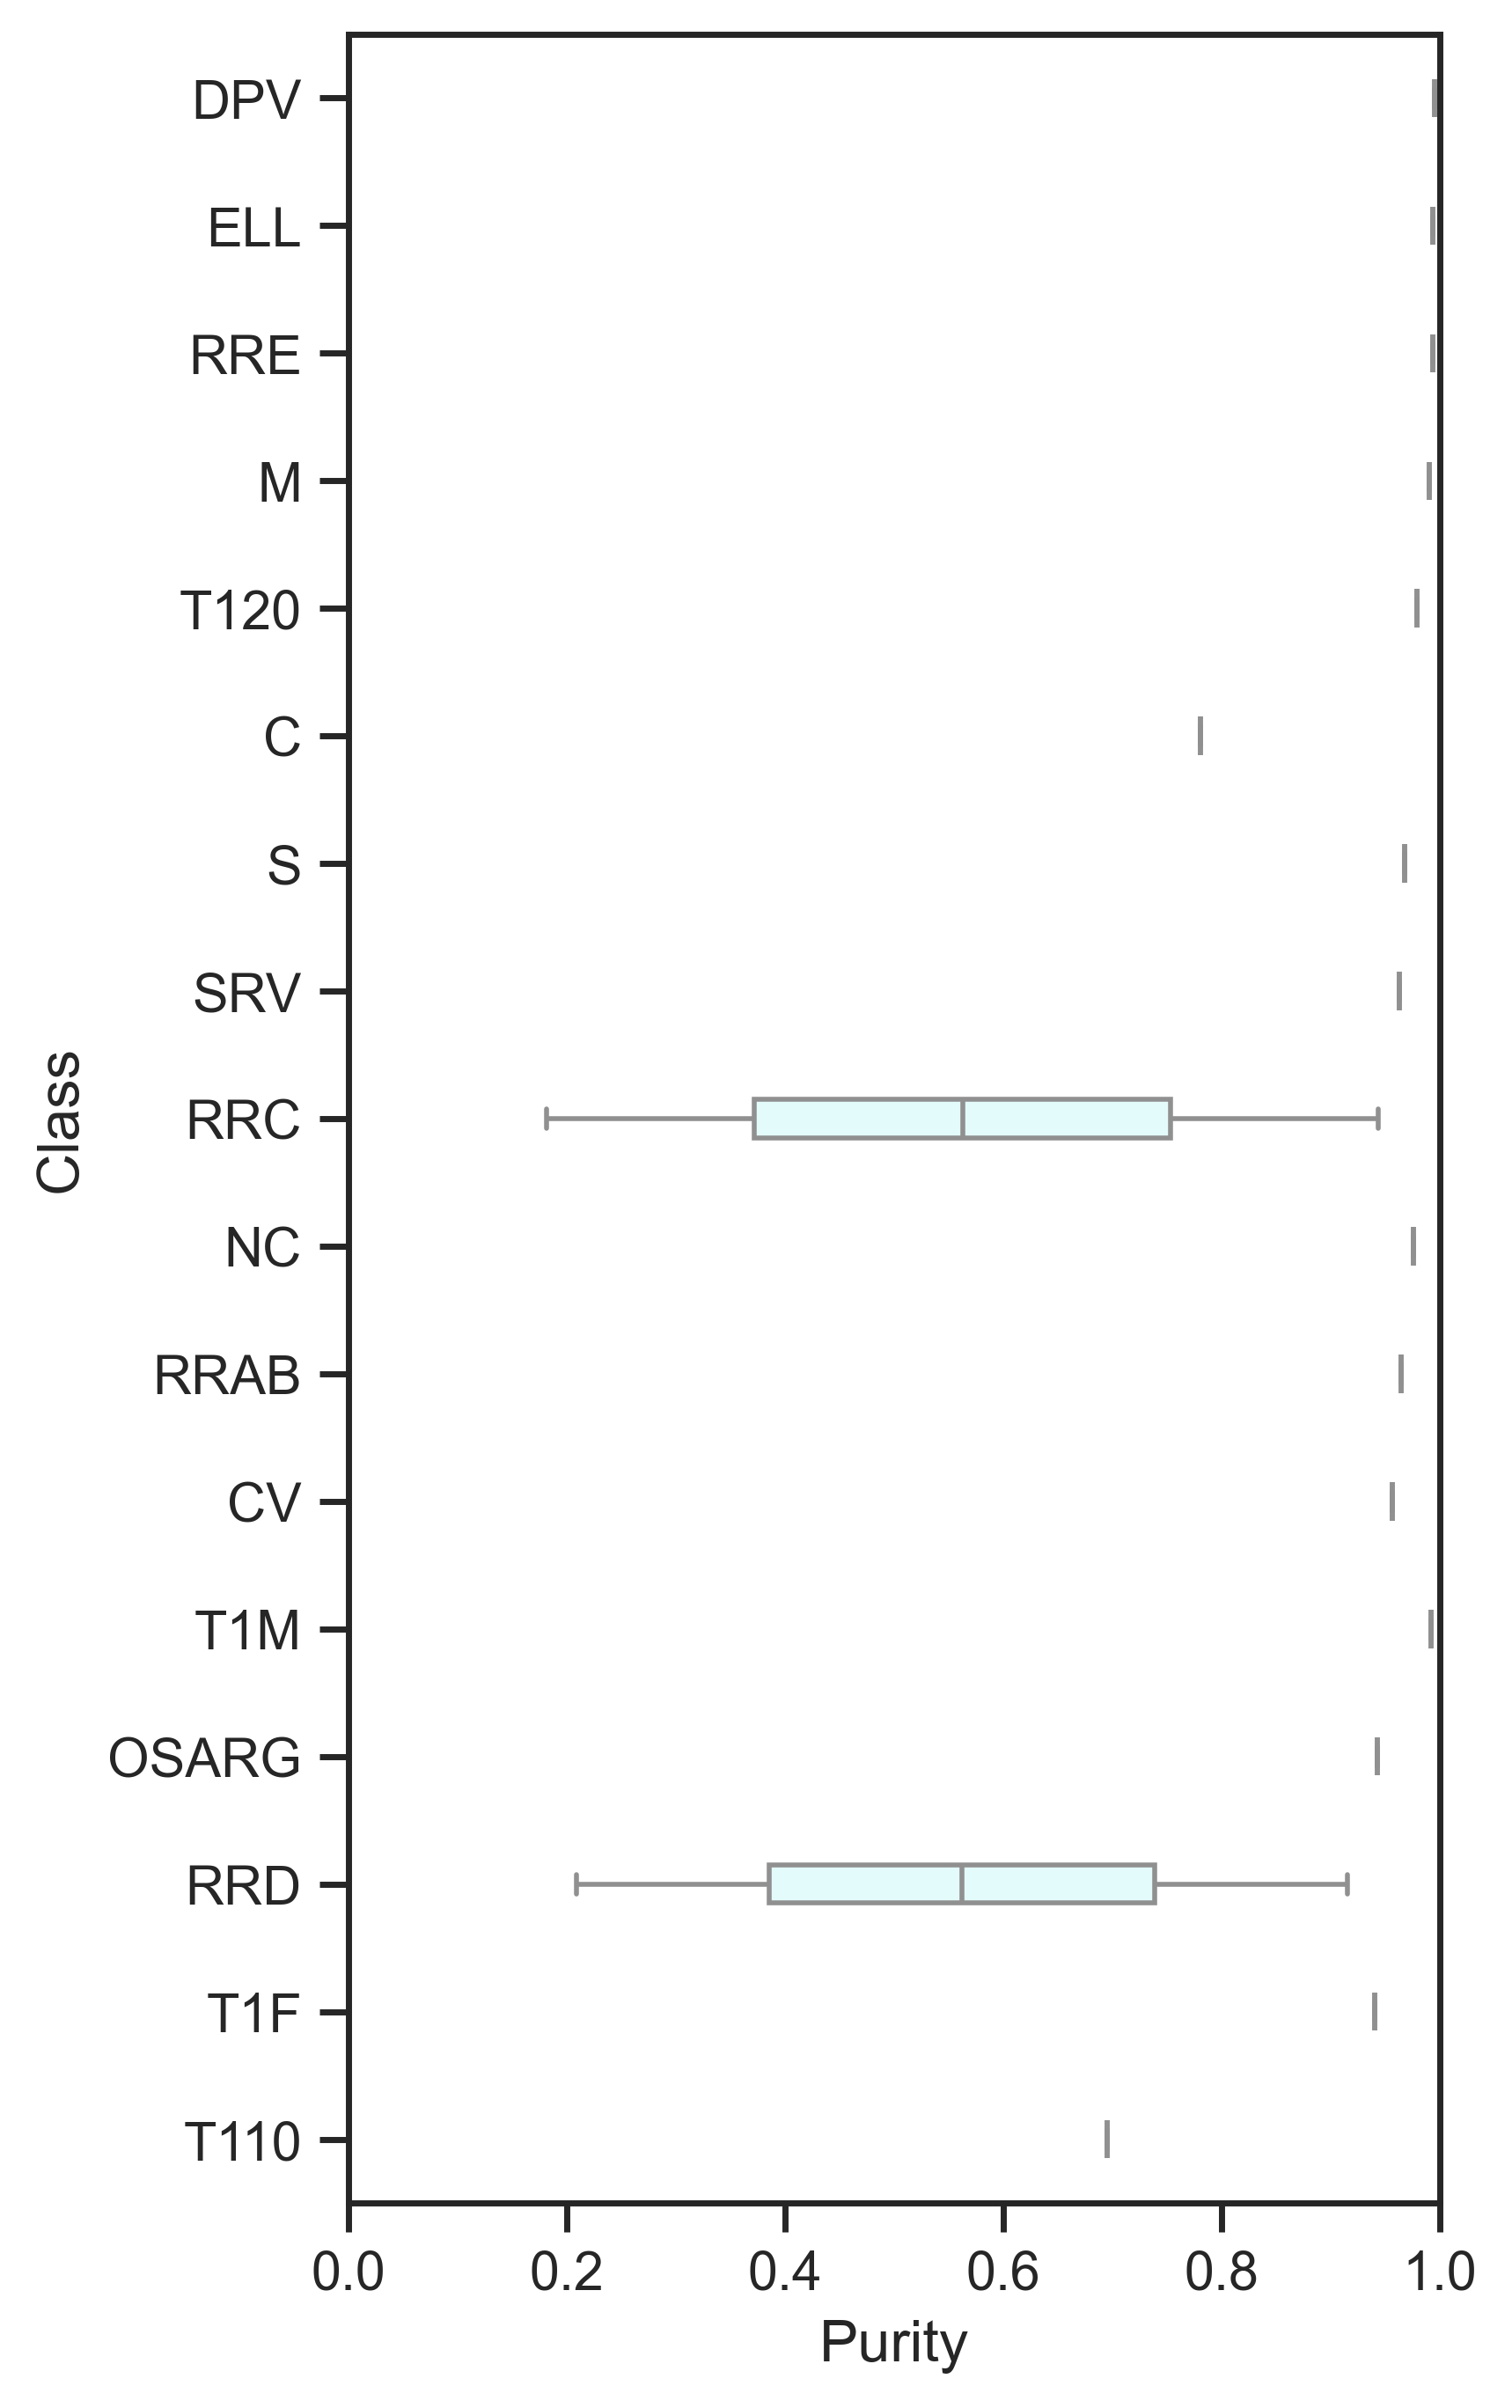

In [17]:

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(4, 8),dpi=400)
#ax.set_xscale("log")
ax.set_xlim(0, 1)
# Load the example planets dataset
#planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
# sns.boxplot(
#     planets, x="distance", y="method", hue="method",
#     whis=[0, 100], width=.6, palette="vlag"
# )
purity = np.array(purity)
C_purity = np.array(C_purity)
df = pd.DataFrame({'Purity':purity,'Class':C_purity})
#颜色为浅蓝

sns.boxplot(x="Purity", y="Class", data=df,
            whis=[0, 100], width=.3,color='#e0ffff')

plt.savefig("purity.png",dpi=400, bbox_inches = 'tight')

#ax.legend()
# Add in points to show each observation
# Tweak the visual presentation
#ax.xaxis.grid(True)
#ax.set(ylabel="")
#sns.despine(trim=True, left=True)